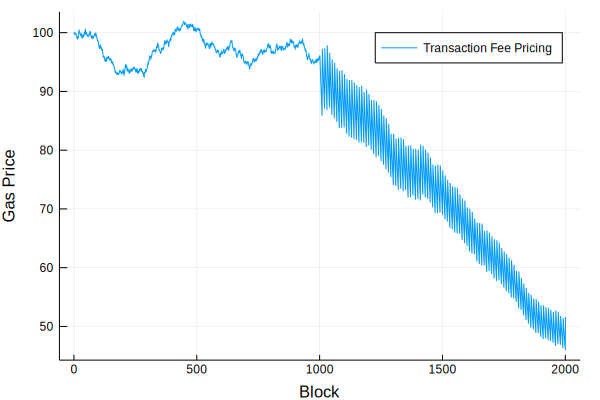

In [1]:
using Plots
# time (the simulation runs for 2T blocks)
T = 1000;
# adjSpeed/2
S = 0.125;
# number of good users
user = 10000;
# number of bad agents
agent = 10;
# network capacity
M = 100_000;
# 10% of transactions are from bad agents
userTX = 1.8*M/user;
agentTX = 0.2*M/agent;
# the initial fee
fee = 100;
# the equilibrium payments
payU = userTX*user*fee/2;
payA = agentTX*agent*fee/2;

transA = 0;
for t in 1:2*T
    volU = sum([rand(0:userTX) for i in 1:user]);
    if t > T
        transA = transA + sum([rand(0:agentTX) for i in 1:agent]);
        if t % 10 == 0
            volA = copy(transA);
            transA = 0;
        else
            volA = 0;
        end
    else
        volA = sum([rand(0:agentTX) for i in 1:agent]);
    end
    payU = [payU; volU*fee[end]];
    payA = [payA; volA*fee[end]];
    fee = [fee; fee[end]*(1+S*((volU + volA)/M - 1))];
end

plot(fee, label = "Transaction Fee Pricing");
xlabel!("Block");
ylabel!("Gas Price")

Total Payment of Bad Agents: 1.6414604097649074e9
Total Payment of Good Users: 1.5119574350551254e10


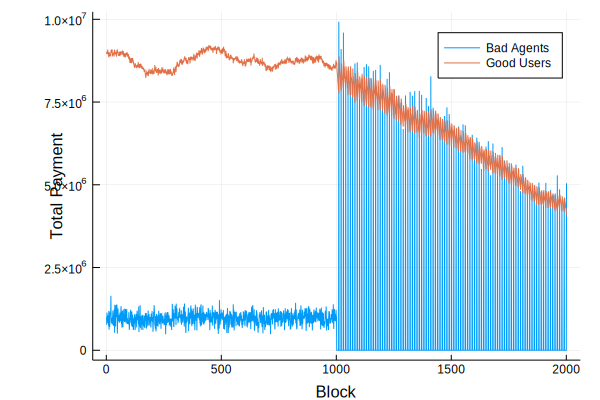

In [2]:
println("Total Payment of Bad Agents: ", sum(payA));
println("Total Payment of Good Users: ", sum(payU));

plot(payA, label = "Bad Agents");
plot!(payU, label = "Good Users");
xlabel!("Block");
ylabel!("Total Payment")